In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


# Data Cleaning

In [18]:
# total_bedrooms 
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

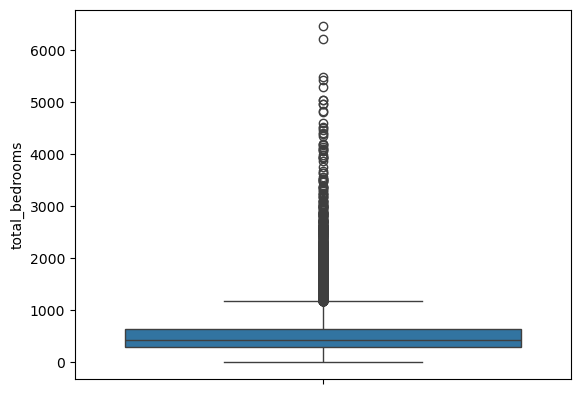

In [22]:
sns.boxplot(df['total_bedrooms'])
plt.show()

In [24]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median()) 

In [26]:
df['total_bedrooms'].describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [32]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
df = pd.get_dummies(data = df, columns = ['ocean_proximity'], drop_first=True)

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [40]:
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

In [44]:
df['ocean_proximity_INLAND'].unique()

array([0, 1])

# EDA

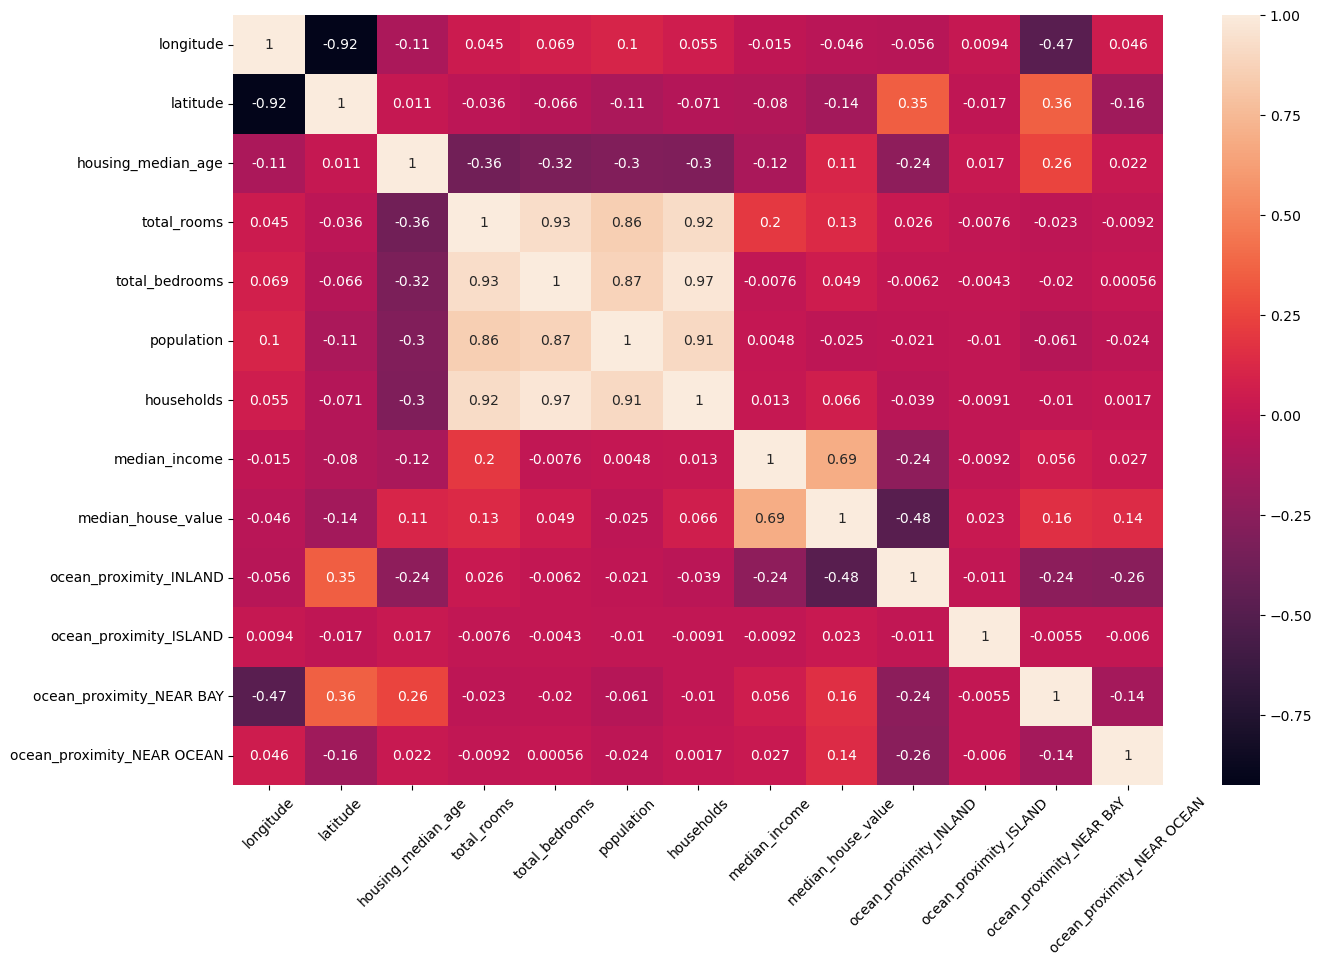

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation=45)
plt.show()

In [61]:
df['median_house_value'].corr(df['median_income'])

0.6880752079585484

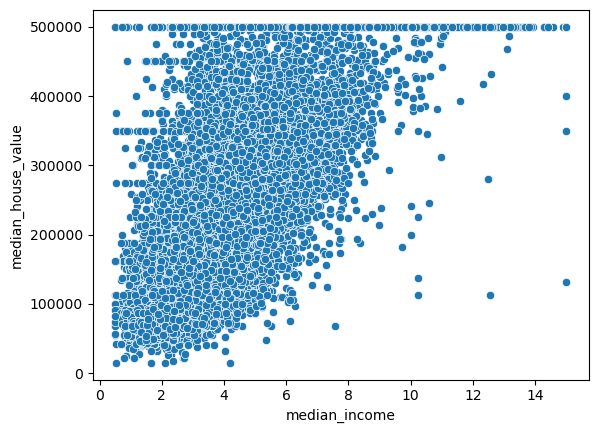

In [66]:
sns.scatterplot(x='median_income', y = 'median_house_value',data = df)
plt.show()

In [116]:
(df["median_house_value"] == 500001).sum()

965

# Linear Regression

In [126]:
# independent & dependent
X = df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [128]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [130]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [134]:
y_pred = regression.predict(X_test_scaled)

In [154]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-score) * (X_test.shape[0] -1) / (X_test.shape[0] - X_test.shape[1] - 1)
print('r2 score:', score)
print('adj r2 score:', adj_r2_score)                            

r2 score: 0.6410660313131733
adj r2 score: 0.6404325252646011


#  Ridge, Lasso, ElasticNet

In [161]:
# ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
score = r2_score(y_test,y_pred)
print('r2 score:',score)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print('adj r2 score:', adj_r2_score)                            

r2 score: 0.6410903999892691
adj r2 score: 0.6404569369505679


In [163]:
# ridgeCv
from sklearn.linear_model import RidgeCV

# log-spaced alpha’lar deneyelim
alphas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

print("Best alpha:", ridge_cv.alpha_)
r2 = r2_score(y_test, ridge_cv.predict(X_test_scaled))

n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("RidgeCV R²:", r2, "Adj R²:", adj_r2)

Best alpha: 10.0
RidgeCV R²: 0.6412857704753769 Adj R²: 0.6406526522588311


In [167]:
# lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
score = r2_score(y_test,y_pred)
print('r2 score:',score)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print('adj r2 score:', adj_r2_score)   

r2 score: 0.6410663152954106
adj r2 score: 0.6404569369505679


In [169]:
# lassoCv
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha:", lasso_cv.alpha_)

r2 = r2_score(y_test, lasso_cv.predict(X_test_scaled))
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("LassoCV R²:", r2, "Adj R²:", adj_r2)
print("Selected features:", sum(lasso_cv.coef_ != 0))

Best alpha: 10.0
LassoCV R²: 0.6410933892862248 Adj R²: 0.6404599315235295
Selected features: 12


In [183]:
import pandas as pd

lasso_coef = pd.Series(lasso_cv.coef_, index=X_train.columns)

print(lasso_coef)

print("\nZeroed out features :")
print(list(lasso_coef[lasso_coef == 0].index))

print("\nSelected features :")
print(list(lasso_coef[lasso_coef != 0].index))

longitude                    -52678.830814
latitude                     -52656.510625
housing_median_age            13763.130346
total_rooms                  -12050.347700
total_bedrooms                44092.007338
population                   -41745.685301
households                    15100.229188
median_income                 74424.660793
ocean_proximity_INLAND       -19132.120451
ocean_proximity_ISLAND         2197.535315
ocean_proximity_NEAR BAY      -1921.892603
ocean_proximity_NEAR OCEAN     1331.658060
dtype: float64

Zeroed out features :
[]

Selected features :
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [179]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

alphas = np.logspace(-3, 3, 40)  # 0.001 → 1000
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha:", lasso_cv.alpha_)
r2 = r2_score(y_test, lasso_cv.predict(X_test_scaled))
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("LassoCV R²:", r2, "Adj R²:", adj_r2)

coef = pd.Series(lasso_cv.coef_, index=X_train.columns)
print("Zeroed:", list(coef[coef==0].index))
print("Non-zero:", list(coef[coef!=0].index))

Best alpha: 41.246263829013564
LassoCV R²: 0.641165941970061 Adj R²: 0.640532612260345
Zeroed: []
Non-zero: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [175]:
coef.sort_values().to_frame("coef")

,coef
longitude,-52678.830814
latitude,-52656.510625
population,-41745.685301
ocean_proximity_INLAND,-19132.120451
total_rooms,-12050.347700
ocean_proximity_NEAR BAY,-1921.892603
ocean_proximity_NEAR OCEAN,1331.658060
ocean_proximity_ISLAND,2197.535315
housing_median_age,13763.130346
households,15100.229188


In [177]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1, 10], l1_ratio=[0.1, 0.5, 0.9], cv=5, random_state=42)
elastic_cv.fit(X_train_scaled, y_train)

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)

r2 = r2_score(y_test, elastic_cv.predict(X_test_scaled))
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("ElasticNetCV R²:", r2, "Adj R²:", adj_r2)
print("Selected features:", sum(elastic_cv.coef_ != 0))

Best alpha: 0.01
Best l1_ratio: 0.9
ElasticNetCV R²: 0.6413568593876845 Adj R²: 0.6407238666406118
Selected features: 12
